In [ ]:
# Choose a place (eg: home), find the forecast over a date range
# Find the nearest 3 mountains with with elevation and prominence thresholds your choice, How far are they
# Visualize how much elevation and prominence the mountains have using a grouped bar chart
# Find the forecast of the nearest mountains (same weather features and date range as before)
# Plot how weather varies over time for each of the closest mountains (and home)
# Conclude if you should climb a mountain or stay at the home (distance and multiple weather features), if so, which is best

# Checkout the weather on top of Everest, how does it compare to home. Show that you can get both daily and hourly variables

In [31]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(tidyverse)
source('/Users/spandandey/Desktop/courses/Data 534/Data534_project/ani_wrapper.R')
mountains<-read.csv('/Users/spandandey/Desktop/courses/Data 534/Data534_project/mountains.csv')
head(mountains)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,latitude,longitude,elevation,prominence
,<dbl>,<dbl>,<dbl>,<dbl>
1,27.9892,86.9256,8737.79,8737.79
2,-32.6533,-70.0117,6915.52,6915.52
3,63.0694,-151.0061,6179.93,6179.93
4,-3.0764,37.3536,5886.79,5886.79
5,19.0303,-97.2703,5591.60,5591.60
6,10.8389,-73.6861,5697.91,5506.06


In [12]:
# Choose a place (eg: home), find the forecast over a date range
home_name<-"Vancouver (UBC)"
home_lat<-49.2593
home_lon<- -123.2475
start_date<- "2026-01-20"
end_date<- "2026-01-27"
home_hourly<-get_forecast(
    latitude=home_lat,
    longitude=home_lon,
    start_date=start_date,
    end_date=end_date,
    time_resolution = "hourly",
    variables = c("temperature_2m", "wind_speed_10m", "rain")
)
head(home_hourly)

,time,temperature_2m,wind_speed_10m,rain
,<dttm>,<dbl>,<dbl>,<dbl>
1,2026-01-20 00:00:00,4.7,2.5,0
2,2026-01-20 01:00:00,3.0,3.8,0
3,2026-01-20 02:00:00,2.4,4.0,0
4,2026-01-20 03:00:00,3.1,4.2,0
5,2026-01-20 04:00:00,3.4,1.8,0
6,2026-01-20 05:00:00,3.2,1.8,0


In [14]:
# Find the nearest 3 mountains with elevation and prominence thresholds your choice, How far are they
nearest_mountains<-get_nearest_mountains(
    latitude=home_lat,
    longitude=home_lon,
    num_mountains=3,
    prominence_threshold = 500, 
    elevation_threshold = 1500
)
nearest_mountains

,latitude,longitude,elevation,prominence,distance_km
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2759,49.4872,-123.1975,1774.19,1280.37,25.6
14968,49.4667,-123.0086,1699.79,789.74,28.9
38862,49.5564,-123.1358,1680.43,570.93,34.0


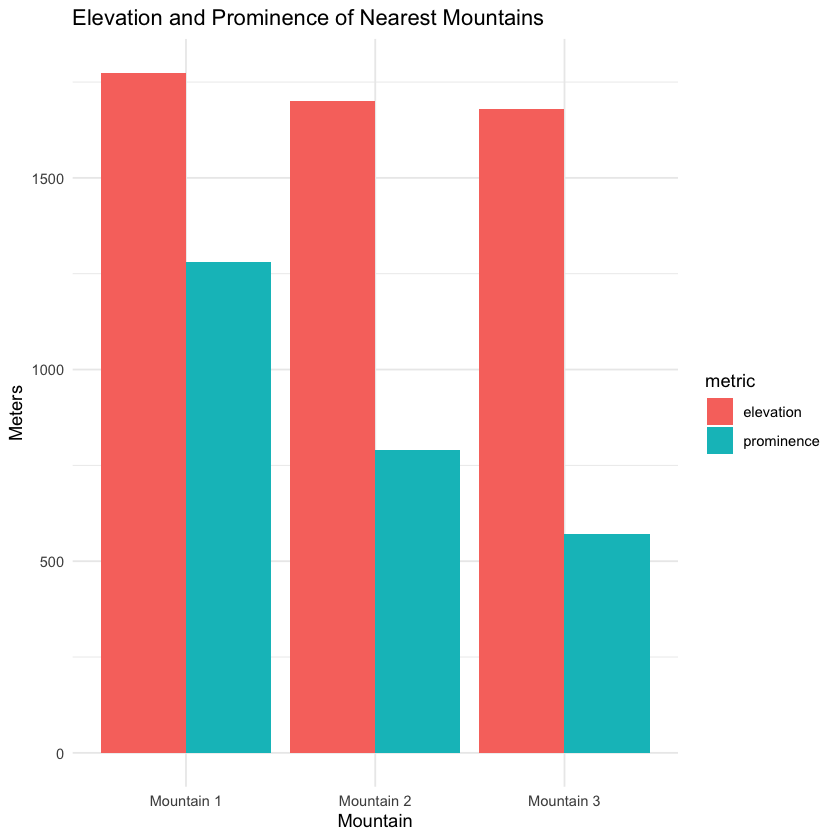

In [24]:
# Visualize how much elevation and prominence the mountains have using a grouped bar chart
mountains_long<-nearest_mountains %>%
    mutate(name = paste0("Mountain ", row_number()))%>%
    select(name, elevation, prominence) %>%
    pivot_longer(
        cols = c(elevation, prominence),
        names_to = "metric",
        values_to = "value"
    )
ggplot(mountains_long,aes(x=name,y=value,fill=metric))+geom_col(position = "dodge")+labs(
    title = "Elevation and Prominence of Nearest Mountains",
    x = "Mountain",
    y = "Meters"
)+theme_minimal()

In [26]:
# Find the forecast of the nearest mountains (same weather features and date range as before)
mountain_temp<-forecast_mountains(
    mountains=nearest_mountains,
    start_date=start_date,
    end_date=end_date,
    time_resolution="hourly",
    weather_feature="temperature_2m"
)
mountain_temp_long<-mountain_temp |>
  pivot_longer(-time, names_to = "location", values_to = "temperature")
mountain_temp_long

time,location,temperature
<dttm>,<chr>,<dbl>
2026-01-20 00:00:00,2759,1.7
2026-01-20 00:00:00,14968,0.8
2026-01-20 00:00:00,38862,1.4
2026-01-20 01:00:00,2759,-0.4
2026-01-20 01:00:00,14968,0.2
2026-01-20 01:00:00,38862,1.5
2026-01-20 02:00:00,2759,-0.7
2026-01-20 02:00:00,14968,-1.0
2026-01-20 02:00:00,38862,-0.4


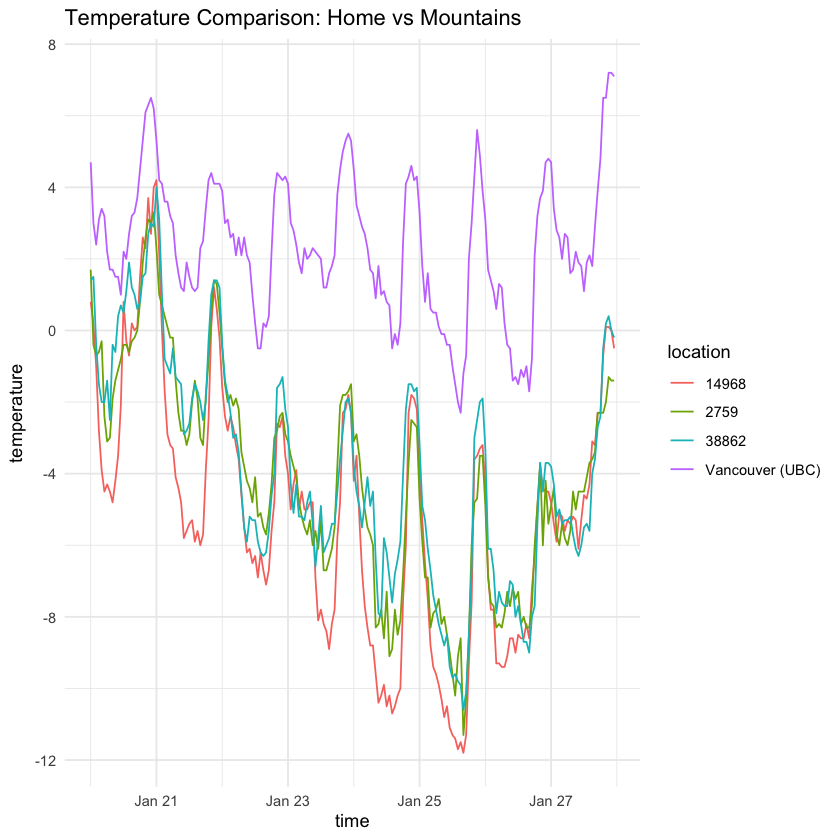

In [28]:
# Plot how weather varies over time for each of the closest mountains (and home)
home_plot_df<-home_hourly %>%
    select(time,temperature_2m) %>%
    mutate(location=home_name) %>%
    rename(temperature=temperature_2m)
combined<-bind_rows(home_plot_df,mountain_temp_long)
ggplot(combined,aes(time, temperature, color = location))+geom_line()+labs(title = "Temperature Comparison: Home vs Mountains")+theme_minimal()

Although Mountain A is closest, it experiences higher wind speeds and lower temperatures. Mountain B offers milder weather while remaining within a reasonable distance, making it the best hiking option during this period.

In [29]:
# Checkout the weather on top of Everest, how does it compare to home. Show that you can get both daily and hourly variables
everest_lat<-27.9881
everest_lon<-86.9520
everest_daily<-get_forecast(
  latitude=everest_lat,
  longitude=everest_lon,
  start_date=start_date,
  end_date=end_date,
  time_resolution="daily",
  variables=c("temperature_2m_max", "wind_speed_10m_max")
)
everest_hourly<-get_forecast(
  latitude=everest_lat,
  longitude=everest_lon,
  start_date=start_date,
  end_date=end_date,
  time_resolution="hourly",
  variables=c("temperature_2m", "wind_speed_10m")
)
home_daily<-get_forecast(
    latitude=home_lat,
  longitude=home_lon,
  start_date=start_date,
  end_date=end_date,
  time_resolution="daily",
  variables=c("temperature_2m_max", "wind_speed_10m_max")
)
home_hourly_everestvars<-get_forecast(
  latitude=home_lat,
  longitude=home_lon,
  start_date=start_date,
  end_date=end_date,
  time_resolution="hourly",
  variables=c("temperature_2m", "wind_speed_10m")
)


In [33]:
daily_summary<-tibble(
    location=c("Home (Vancouver)", "Everest"),
    avg_temp_max=c(mean(home_daily$temperature_2m_max, na.rm = TRUE),
                   mean(everest_daily$temperature_2m_max, na.rm = TRUE)),
    avg_wind_max = c(mean(home_daily$wind_speed_10m_max, na.rm = TRUE),
                   mean(everest_daily$wind_speed_10m_max, na.rm = TRUE))
)
daily_summary

location,avg_temp_max,avg_wind_max
<chr>,<dbl>,<dbl>
Home (Vancouver),5.4875,11.3625
Everest,-15.7500,19.9750


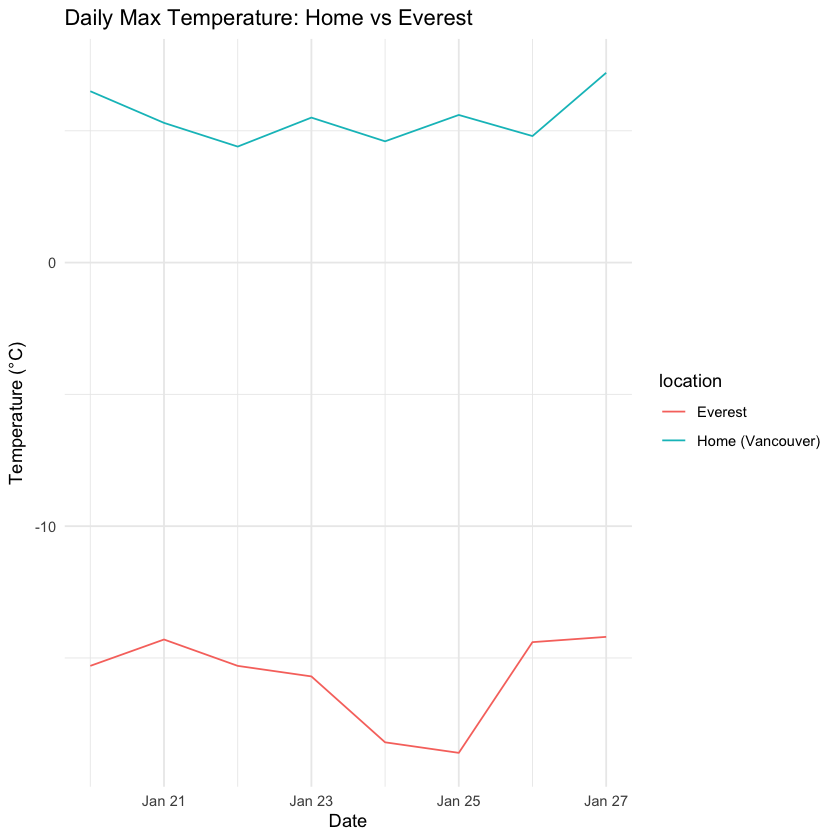

In [34]:
home_daily <- home_daily %>%
  mutate(location = "Home (Vancouver)")
everest_daily <- everest_daily %>%
  mutate(location = "Everest")
daily_compare <- bind_rows(home_daily, everest_daily)
ggplot(daily_compare,aes(x = time, y = temperature_2m_max, color = location))+geom_line()+labs(
    title = "Daily Max Temperature: Home vs Everest",
    x = "Date",
    y = "Temperature (°C)"
  )+theme_minimal()

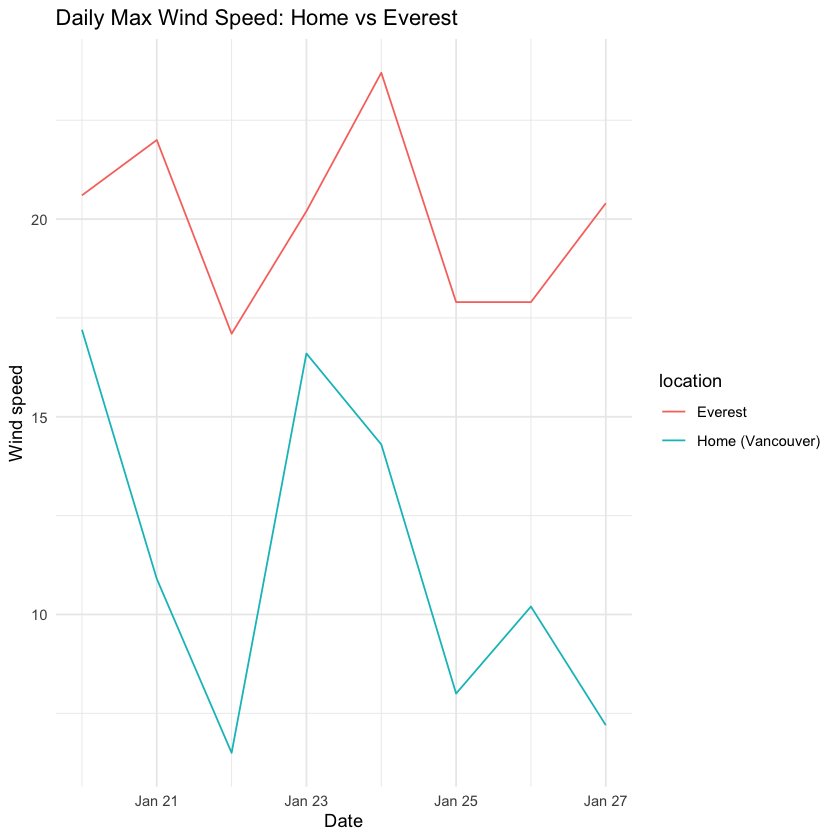

In [36]:
home_daily <- home_daily %>%
  mutate(location = "Home (Vancouver)")
everest_daily <- everest_daily %>%
  mutate(location = "Everest")
daily_compare <- bind_rows(home_daily, everest_daily)
ggplot(daily_compare,aes(x = time, y = wind_speed_10m_max, color = location))+geom_line()+
labs(
    title = "Daily Max Wind Speed: Home vs Everest",
    x = "Date",
    y = "Wind speed"
  )+ theme_minimal()


Everest is consistently colder than Vancouver across the selected date range, with much lower daily maximum temperatures. Wind speeds are also higher at Everest, especially in the hourly series. This section demonstrates retrieving and comparing both daily summary variables (temperature_2m_max, wind_speed_10m_max) and hourly variables (temperature_2m, wind_speed_10m) using the wrapper.